# TER: Aide à l’orientation dans le supérieur : SVM (3 classes)


In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Colab Notebooks/TER/" 

Mounted at /content/drive


In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


In [3]:
import warnings
warnings.filterwarnings('ignore')


### Selection du nouveau train set et test set précédemment générés 


In [4]:
# données de train
df1_train = pd.read_csv(path+'generated_data_class3/train1.csv')
df2_train = pd.read_csv(path+'generated_data_class3/train2.csv')
df3_train = pd.read_csv(path+'generated_data_class3/train3.csv')
df4_train = pd.read_csv(path+'generated_data_class3/train4.csv')
df5_train = pd.read_csv(path+'generated_data_class3/train5.csv')
df6_train = pd.read_csv(path+'generated_data_class3/train6.csv')
df7_train = pd.read_csv(path+'generated_data_class3/train7.csv')
df8_train = pd.read_csv(path+'generated_data_class3/train8.csv')
df9_train = pd.read_csv(path+'generated_data_class3/train9.csv')
df10_train = pd.read_csv(path+'generated_data_class3/train10.csv')
df11_train = pd.read_csv(path+'generated_data_class3/train11.csv')
df12_train = pd.read_csv(path+'generated_data_class3/train12.csv')
df13_train = pd.read_csv(path+'generated_data_class3/train13.csv')
df14_train = pd.read_csv(path+'generated_data_class3/train14.csv')
df15_train = pd.read_csv(path+'generated_data_class3/train15.csv')

#données de test
df1_test = pd.read_csv(path+'generated_data_class3/test1.csv')
df2_test = pd.read_csv(path+'generated_data_class3/test2.csv')
df3_test = pd.read_csv(path+'generated_data_class3/test3.csv')
df4_test = pd.read_csv(path+'generated_data_class3/test4.csv')
df5_test = pd.read_csv(path+'generated_data_class3/test5.csv')
df6_test = pd.read_csv(path+'generated_data_class3/test6.csv')
df7_test = pd.read_csv(path+'generated_data_class3/test7.csv')
df8_test = pd.read_csv(path+'generated_data_class3/test8.csv')
df9_test = pd.read_csv(path+'generated_data_class3/test9.csv')
df10_test = pd.read_csv(path+'generated_data_class3/test10.csv')
df11_test = pd.read_csv(path+'generated_data_class3/test11.csv')
df12_test = pd.read_csv(path+'generated_data_class3/test12.csv')
df13_test = pd.read_csv(path+'generated_data_class3/test13.csv')
df14_test = pd.read_csv(path+'generated_data_class3/test14.csv')
df15_test = pd.read_csv(path+'generated_data_class3/test15.csv')

df_train = [df1_train,df2_train,df3_train,df4_train,df5_train,df6_train,df7_train,df8_train,df9_train,df10_train,df11_train,df12_train,df13_train,df14_train,df15_train]
df_test = [df1_test,df2_test,df3_test,df4_test,df5_test,df6_test,df7_test,df8_test,df9_test,df10_test,df11_test,df12_test,df13_test,df14_test,df15_test]

In [5]:
#résultats des élèves classe 0(echecs) ou 1(reussites) ou 2(moyens)
y_col = 'resultats_iut_tdats1'

Prepare Data

In [6]:
X_train,y_train,X_test,y_test = [],[],[],[]

for i in range(15):
    dfi_train = df_train[i]
    dfi_test = df_test[i]
    y_train.append(dfi_train[y_col])
    X_train.append(dfi_train[dfi_train.columns.drop(y_col)])
    y_test.append(dfi_test[y_col])
    X_test.append(dfi_test[dfi_test.columns.drop(y_col)])
    
    #it's usually a good practice to use feature scaling, such as standardization, 
    #before training an SVM model, especially if the features have different scales.
    #Scaling the features can help the SVM model to converge faster and avoid issues with numerical stability.
    sc = StandardScaler()
    X_train[i] = sc.fit_transform(X_train[i])
    X_test[i] = sc.transform(X_test[i])

### SVM

In [8]:
# Create an SVM object
clf = SVC()

# Define the parameter grid to search over
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

Acc, Precis, Recall, F1 = [],[],[],[]
y_pred = []

for i in range(15):
    
  # Fit the grid search object on the training data
  grid_search.fit(X_train[i], y_train[i])

  # Predict the labels of the test data using the best kernel found
  y_predicted = grid_search.predict(X_test[i])
  y_pred.append(y_predicted)

  # Calculating the evaluation metrics (for multiclass: 'macro' calculates precision for each class and then takes the average, 
  #'weighted' calculates precision for each class and takes the weighted average based on the number of samples in each class.)
  accuracy = accuracy_score(y_test[i], y_predicted)
  Acc.append(accuracy)
  precision = precision_score(y_test[i], y_predicted, average='weighted')
  Precis.append(precision)
  recall = recall_score(y_test[i], y_predicted, average='weighted')
  Recall.append(recall)
  f1 = f1_score(y_test[i], y_predicted, average='weighted')
  F1.append(f1)

  # Printing the evaluation metrics and the best hyperparameters
  print(' ')
  print('DATASET ', i+1)
  print("Best kernel:", grid_search.best_params_['kernel'])
  print("Accuracy: ", accuracy)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1 score: ", f1)


 
DATASET  1
Best kernel: linear
Accuracy:  0.5609756097560976
Precision:  0.532520325203252
Recall:  0.5609756097560976
F1 score:  0.544206043564195
 
DATASET  2
Best kernel: sigmoid
Accuracy:  0.5365853658536586
Precision:  0.30853658536585366
Recall:  0.5365853658536586
F1 score:  0.39179248935346506
 
DATASET  3
Best kernel: sigmoid
Accuracy:  0.5853658536585366
Precision:  0.3955174686882004
Recall:  0.5853658536585366
F1 score:  0.4720692368214005
 
DATASET  4
Best kernel: linear
Accuracy:  0.5121951219512195
Precision:  0.4441347270615563
Recall:  0.5121951219512195
F1 score:  0.4630683934871693
 
DATASET  5
Best kernel: linear
Accuracy:  0.6097560975609756
Precision:  0.5954006968641116
Recall:  0.6097560975609756
F1 score:  0.5985902314266109
 
DATASET  6
Best kernel: sigmoid
Accuracy:  0.6341463414634146
Precision:  0.49037227214377416
Recall:  0.6341463414634146
F1 score:  0.5320121951219512
 
DATASET  7
Best kernel: sigmoid
Accuracy:  0.6097560975609756
Precision:  0.579326

#### Moyenne des valeurs des métriques pour chaque Dataset

In [12]:
print("Mean of test accuracy for the 15 dataset = ", np.mean(Acc))
print("Mean of test precision for the 15 dataset = ", np.mean(Precis))
print("Mean of test f1_score for the 15 dataset = ", np.mean(F1))
print("Mean of test recall for the 15 dataset = ", np.mean(recall))

Mean of test accuracy for the 15 dataset =  0.5609756097560975
Mean of test precision for the 15 dataset =  0.4902522283212375
Mean of test f1_score for the 15 dataset =  0.4943880236395087
Mean of test recall for the 15 dataset =  0.5609756097560976


### Matrice de confusion

DATASET  1


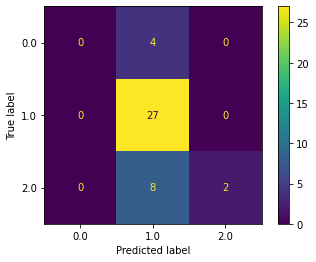

DATASET  2


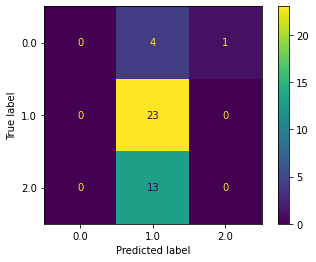

DATASET  3


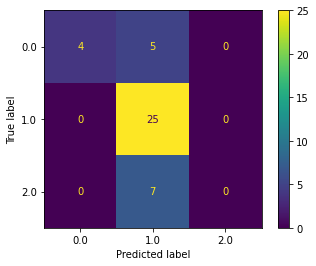

DATASET  4


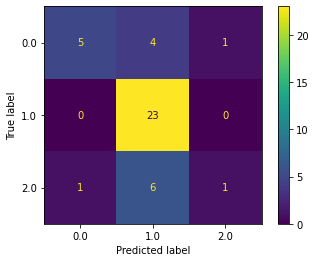

DATASET  5


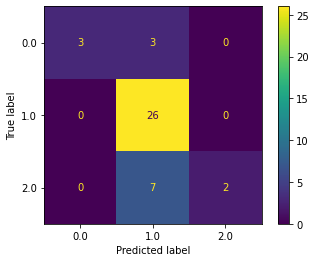

DATASET  6


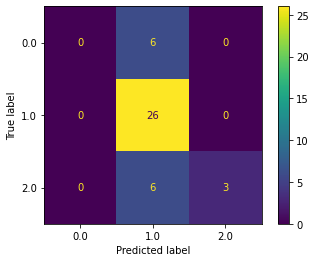

DATASET  7


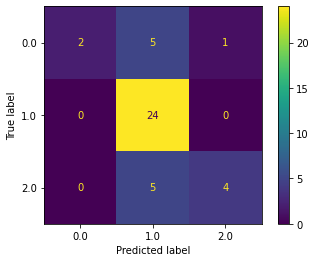

DATASET  8


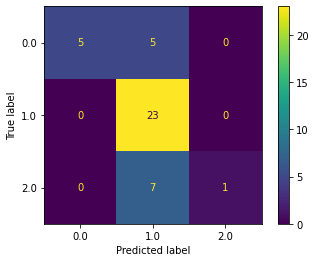

DATASET  9


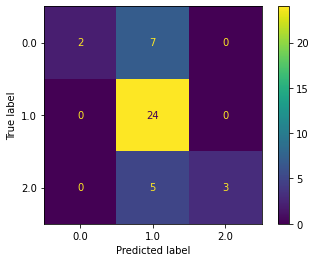

DATASET  10


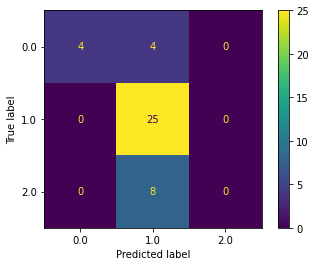

DATASET  11


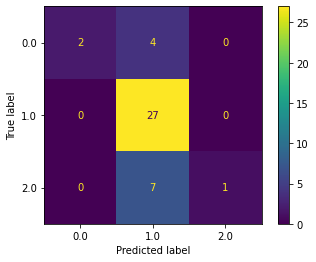

DATASET  12


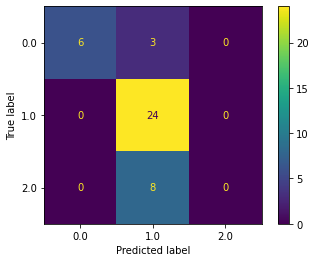

DATASET  13


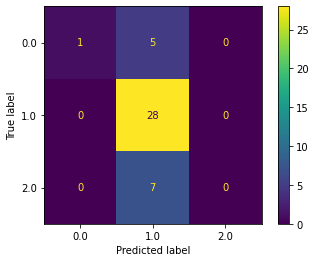

DATASET  14


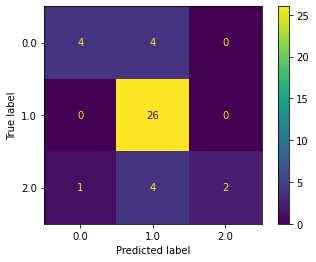

DATASET  15


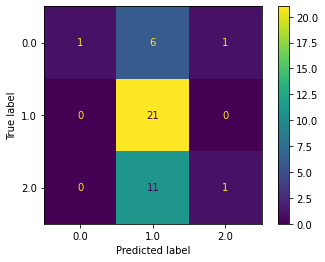

In [10]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Getting the best model and its parameters
best_model = grid_search.best_estimator_

y_pred = []

for i in range(15):
  # Making predictions on the test set using the best model
  y_predicted = best_model.predict(X_test[i])
  y_pred.append(y_predicted)

  # Creating the confusion matrix
  cm = confusion_matrix(y_test[i], y_predicted)

  # Plotting the confusion matrix
  print('DATASET ',i+1)
  plot_confusion_matrix(best_model, X_test[i], y_test[i])
  plt.show()


